In [24]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import quandl as q
q.ApiConfig.api_key = "R8WuAzDWGs-WFHsyJo25"

In [25]:
sp500 = q.get('YAHOO/INDEX_GSPC')
mask_1 = (sp500.index >= '1978-01-03')
sp500 = sp500[mask_1]

vix_raw = q.get('YAHOO/INDEX_VIX', collapse='monthly')
dji_raw = q.get('YAHOO/INDEX_DJI')

pmi_new_oder = q.get('ISM/MAN_NEWORDERS')
pmi = q.get('ISM/MAN_PMI')

In [73]:
tcu = pd.read_csv('data_raw/tcu_rate.csv', index_col=0)
tcu.index = tcu.index.to_datetime()

hike_cycle = pd.read_csv('data_cleaned/rate_hike_circles.csv', index_col=0)
recession_cycle = pd.read_csv('data_cleaned/recession_circles.csv', index_col=0)

gdp_us = pd.read_csv('data_cleaned/real_gdp_index.csv', index_col=0)
gdp_us.index = gdp_us.index.to_datetime()
mask = (gdp_us.index >= '1978-01-03')
gdp_us = gdp_us[mask]

fed_rate = pd.read_csv('data_cleaned/effr_cleaned.csv', index_col=0)
fed_rate.index = fed_rate.index.to_datetime()
mask = (fed_rate.index >= '1978-01-03')
fed_rate = fed_rate[mask]

cpi_us = pd.read_csv('data_raw/cpi_rate.csv', index_col=0)
cpi_us.index = cpi_us.index.to_datetime()
mask = (cpi_us.index >= '1978-01-03')
cpi_us = cpi_us[mask]

dx = pd.read_csv('data_raw/dx_f_m.csv', index_col=0)
dx.index = dx.index.to_datetime()
mask = (dx.index >= '1978-01-03')
dx = dx[mask]

gold = pd.read_csv('data_raw/gc_f_m.csv', index_col=0)
gold.index = gold.index.to_datetime()
mask = (gold.index >= '1978-01-03')
gold = gold[mask]

un_rate = pd.read_csv('data_raw/un_rate_us.csv', index_col=0)
un_rate.index = un_rate.index.to_datetime()
mask = (un_rate.index >= '1978-01-03')
un_rate = un_rate[mask]

gdp_us_rate = pd.read_csv('data_raw/gdp_real_rate.csv', index_col=0)
gdp_us_rate.index = gdp_us_rate.index.to_datetime()
mask = (gdp_us_rate.index >= '1978-01-03')
gdp_us_rate = gdp_us_rate[mask]

output_gap = pd.read_csv('data_raw/output_gap.csv', index_col=0)
output_gap.index = output_gap.index.to_datetime()
mask = (output_gap.iloc[:,0] != '.')
output_gap = output_gap[mask]

In [53]:
from dateutil.relativedelta import relativedelta
gdp_us_rate = pd.read_csv('data_raw/gdp_real_rate.csv', index_col=0)
gdp_us_rate.index = gdp_us_rate.index.to_datetime()
mask = (gdp_us_rate.index >= '1978-01-03')
gdp_us_rate = gdp_us_rate[mask]

three_mon_rel = relativedelta(months=4)
gdp_us_rate.index = [i + three_mon_rel for i in gdp_us_rate.index]


In [8]:
cycle_up = pd.DataFrame(np.zeros((15, 4)), columns=['start', 'end', 'Duration', 'Characteristics'])
cycle_down = pd.DataFrame(np.zeros((14, 4)), columns=['start', 'end', 'Duration', 'Characteristics'])

In [10]:
cycle_up.iloc[0, :] = ['1975-05-16', '1976-05-16' , 12, ''] 
cycle_up.iloc[1, :] = ['1978-02-16', '1979-02-16' , 12, ''] 
cycle_up.iloc[2, :] = ['1980-07-16', '1981-07-16' , 12, ''] 
cycle_up.iloc[3, :] = ['1982-10-16', '1984-02-16' , 16, ''] 
cycle_up.iloc[4, :] = ['1985-07-16', '1987-10-16' , 27, ''] 
cycle_up.iloc[5, :] = ['1990-01-16', '1990-07-16' , 6, '']
cycle_up.iloc[6, :] = ['1991-03-16', '1994-06-16' , 39, ''] 
cycle_up.iloc[7, :] = ['1996-01-16', '1997-10-16' , 21, ''] 
cycle_up.iloc[8, :] = ['1998-11-16', '2000-04-16' , 17, ''] 
cycle_up.iloc[9, :] = ['2001-11-16', '2002-11-16' , 12, ''] 
cycle_up.iloc[10, :] = ['2003-06-16', '2005-03-16' , 21, ''] 
cycle_up.iloc[11, :] = ['2007-01-16', '2007-11-16' , 10, ''] 
cycle_up.iloc[12, :] = ['2009-06-16', '2010-06-16' , 12, ''] 
cycle_up.iloc[13, :] = ['2013-01-16', '2014-07-16' , 18, ''] 
cycle_up.iloc[14, :] = ['2015-12-16', '2017-04-11' , 16, ''] 

In [26]:
cycle_down.iloc[0, :] = ['1976-05-16', '1978-02-16', 21, ''] 
cycle_down.iloc[1, :] = ['1979-02-16', '1980-07-16', 17, ''] 
cycle_down.iloc[2, :] = ['1981-07-16', '1982-10-16', 15, ''] 
cycle_down.iloc[3, :] = ['1984-02-16', '1985-07-16', 17, ''] 
cycle_down.iloc[4, :] = ['1987-10-16', '1990-01-16', 27, ''] 
cycle_down.iloc[5, :] = ['1990-07-16', '1991-03-16', 8, '']
cycle_down.iloc[6, :] = ['1994-06-16', '1996-01-16', 19, ''] 
cycle_down.iloc[7, :] = ['1997-10-16', '1998-11-16', 13, ''] 
cycle_down.iloc[8, :] = ['2000-04-16', '2001-11-16', 19, ''] 
cycle_down.iloc[9, :] = ['2002-11-16', '2003-06-16', 7, ''] 
cycle_down.iloc[10, :] = ['2005-03-16', '2007-01-16', 22, ''] 
cycle_down.iloc[11, :] = ['2007-11-16', '2009-06-16', 19, ''] 
cycle_down.iloc[12, :] = ['2010-06-16', '2013-01-16' , 31, ''] 
cycle_down.iloc[13, :] = ['2014-07-16', '2015-12-16', 17, ''] 


(722110.0, 736420.0)

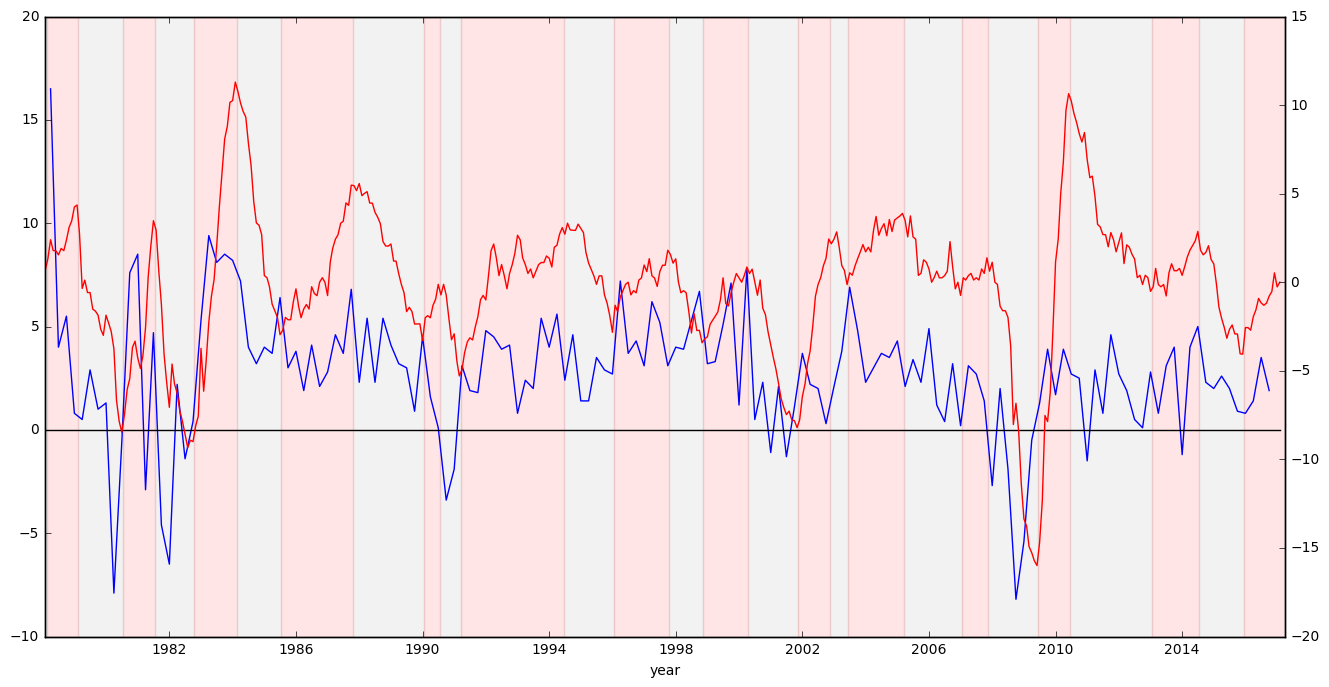

In [77]:
fig, ax1 = plt.subplots()
fig.set_size_inches(16, 8)
ax1.plot(gdp_us_rate.index, gdp_us_rate.iloc[:, 0])
#ax1.plot(tcu.index, tcu.iloc[:, 0])
#ax1.plot(sp500.index, sp500.iloc[:, 0])
#ax1.plot(dji_raw.index, dji_raw.iloc[:, 0])
#ax1.plot(un_rate.index, un_rate.iloc[:, 0])


#ax1.plot(gdp_rate.index, gdp_rate.iloc[:, 0])
plt.xlabel('year')
plt.plot((tcu.index[0], tcu.index[-1]), (0, 0), 'k-')

#plt.ylabel('Fed Rate')
for i in xrange(15):
    ax1.axvspan(cycle_up.iloc[i, 0], cycle_up.iloc[i, 1], alpha=0.1, color='red')
    if i < 14:
        ax1.axvspan(cycle_down.iloc[i, 0], cycle_down.iloc[i, 1], alpha=0.1, color='grey')
ax2 = ax1.twinx()
#ax2.plot(output_gap.index, output_gap.iloc[:, 0], 'r')
#ax2.plot(un_rate.index, un_rate.iloc[:, 0], 'r')
ax2.plot(tcu.index, tcu.iloc[:, 0], 'r')

ax2.set_xlim([datetime.date(1978, 1, 26), datetime.date(2017, 4, 1)])

#ax3 = ax1.twinx()
#ax3.plot(tcu.index, tcu.iloc[:, 0], 'g')